In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import regex as re

In [2]:
URL = requests.get('https://www.cbr.com/most-popular-anime-characters/',headers={
"User-Agent" : "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36"
})

In [3]:
soup = BeautifulSoup(URL.content,'html.parser')

In [4]:
character= soup.find_all('h2')

In [5]:
votes = ['40100']
popular_character = ['']
for i in character:
    vote=re.search("[0-9]+,[0-9]+",i.text)
    char = re.search(r"[a-zA-Z_ ]+",i.text)
    votes.append(vote.group())
    popular_character.append(char.group())

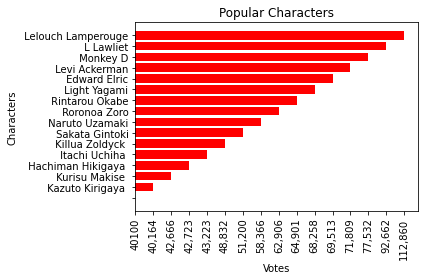

In [11]:
plt.barh(popular_character,votes,color="red")
plt.xlabel("Votes")
plt.ylabel("Characters")
plt.title("Popular Characters")
plt.xticks(votes, [str(i) for i in votes], rotation=90)
plt.savefig("popular.png",bbox_inches="tight",pad_inches=1,transparent=True)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()